In [1]:
import csv
import pandas as pd
import numpy as np
import json
import random

In [2]:
from os.path import join, dirname, abspath, exists
import sys
sys.path.append("..")
from continuous.utils import load_appli_data, load_appld_data, preprocessing

In [4]:
xd, yd = load_appld_data()
xi, yi = load_appli_data()
x = np.concatenate([xi, xd])
y = np.concatenate([yi, yd])

In [11]:
np.unique(y, axis=0, return_counts=True)


(array([[  2.20000000e-01,   8.70000000e-01,   1.30000000e+01,
           3.10000000e+01,   3.00000000e-01,   3.60000000e-01,
           7.10000000e-01,   3.00000000e-01],
        [  2.50000000e-01,   1.34000000e+00,   8.00000000e+00,
           5.90000000e+01,   4.30000000e-01,   6.50000000e-01,
           9.80000000e-01,   4.00000000e-01],
        [  2.60000000e-01,   2.00000000e+00,   1.30000000e+01,
           4.40000000e+01,   5.70000000e-01,   7.60000000e-01,
           9.40000000e-01,   2.00000000e-02],
        [  3.10000000e-01,   1.05000000e+00,   1.70000000e+01,
           2.00000000e+01,   4.50000000e-01,   6.10000000e-01,
           2.20000000e-01,   2.30000000e-01],
        [  3.70000000e-01,   1.33000000e+00,   9.00000000e+00,
           6.00000000e+00,   9.50000000e-01,   8.30000000e-01,
           9.30000000e-01,   1.00000000e-02],
        [  7.10000000e-01,   9.10000000e-01,   1.60000000e+01,
           5.30000000e+01,   5.50000000e-01,   5.40000000e-01,
           9.1

In [23]:
rx, ry = load_applr_data()
rxx, ryy = preprocessing(rx, ry, 4)

In [28]:
xx.shape, rxx.shape, yy.shape, ryy.shape

((520, 721), (501, 721), (520, 8), (501, 8))

In [33]:
a = np.concatenate([x, rx])
a.shape

(1021, 721)

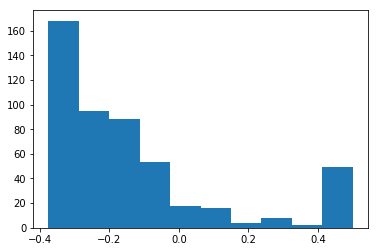

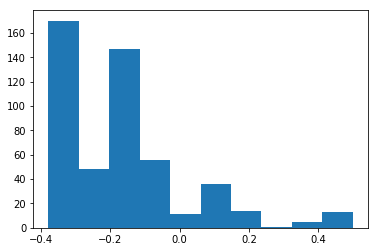

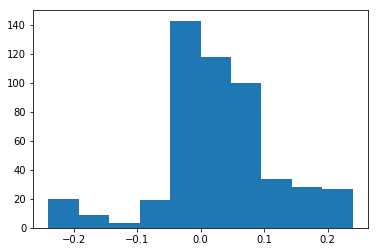

In [25]:
plt.hist(rxx[:,719])
plt.show()
plt.hist(rxx[:,0])
plt.show()
plt.hist(rxx[:,720])
plt.show()

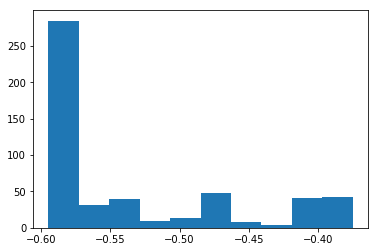

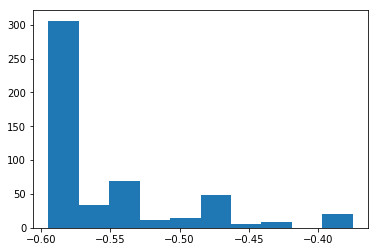

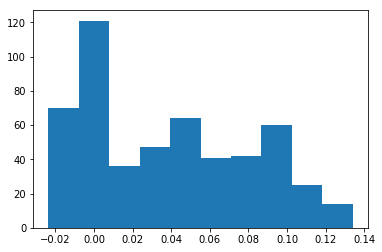

In [26]:
from matplotlib import pyplot as plt
plt.hist(xx[:,719])
plt.show()
plt.hist(xx[:,0])
plt.show()
plt.hist(xx[:,720])
plt.show()

In [51]:
k = "open"
sc_pd = pd.read_csv("/home/users/zifanxu/APPLR-1/data/APPLD_Bags/%s/timed_front_scan/_slash_front_slash_scan.csv" %(k))
lg_pd = pd.read_csv("/home/users/zifanxu/APPLR-1/data/APPL-DI/APPLD/%s_local_goal.csv" %(k))

In [96]:
a = sc_pd.loc[0]["ranges"][1:-1].split(",")
a = [float(i) for i in a]

In [95]:
def from_2095_to_720(ranges):
    angles2 = np.linspace(-np.pi*3/4, np.pi*3/4, 721)[1:]
    inc = 2*np.pi/2096
    ranges2 = []
    for a in angles2:
        idx1 = int((a + np.pi-inc)/inc)
        idx2 = idx1+1
        r = (ranges[idx1]+ranges[idx2])/2
        ranges2.append(r)
    return ranges2

In [15]:
angles1 = np.linspace(-np.pi, np.pi, 2096)[1:]
angles2 = np.linspace(-np.pi*3/4, np.pi*3/4, 721)[1:]
inc = 2*np.pi/2096

a = -np.pi*3/4-0.1
idx1 = int((a + np.pi-inc)/inc)
idx2 = idx1+1
angles1[idx1]-a, a, angles1[idx2]-a

(-0.0015956574132256485, -2.456194490192345, 0.0014034763849504195)

In [18]:
angles2[100]/np.pi*180

-97.125

In [94]:
(np.inf+1)/2

inf

In [75]:
inc = 2*np.pi/2096

0.002997702913730719

In [4]:
def load_config(config_path):
    with open(config_path, "r") as f:
        config = json.load(f)
    return config

In [5]:
from tianshou.utils.net.common import Net
from tianshou.exploration import GaussianNoise
from tianshou.utils.net.continuous import Actor, ActorProb, Critic
from tianshou.data import Batch
from tianshou.data import to_torch
import torch

In [7]:
config_path = "../../continuous/configs/td3_condor.json"
config = load_config(config_path)

In [8]:
env_config = config['env_config']
training_config = config['training_config']
state_shape = np.array([721])
action_shape = np.array([8])

In [12]:
range_dict = {
    'max_vel_x': [0.2, 2],
    'max_vel_theta': [0.314, 3.14],
    'vx_samples': [4, 20],
    'vtheta_samples': [4, 60],
    'occdist_scale': [0.05, 1],
    'path_distance_bias': [0.1, 1.5],
    'goal_distance_bias': [0.1, 2],
    'inflation_radius': [0.01, 0.5]
}
action_space_low = np.array([range_dict[pn][0] for pn in env_config['param_list']])
action_space_high = np.array([range_dict[pn][1] for pn in env_config['param_list']])
action_bias = torch.tensor((action_space_low + action_space_high) / 2.0, device=device)
action_scale = torch.tensor((action_space_high - action_space_low) / 2.0, device=device)

def output_to_action(outputs):
    actions = to_torch(outputs, device=device, dtype=torch.float32)
    actions *= action_scale
    actions += action_bias
    return actions

In [82]:
a = np.array(range(100))
a[a[::5]]

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [84]:
seed = 13
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net(training_config['num_layers'], state_shape, device=device, hidden_layer_size=training_config['hidden_size'])

if config['section'] == 'SAC':
    actor = ActorProb(
        net, action_shape,
        1, device, hidden_layer_size=training_config['hidden_size']
    ).to(device)
else:
    actor = Actor(
        net, action_shape,
        1, device, hidden_layer_size=training_config['hidden_size']
    ).to(device)
    
optimizer = torch.optim.Adam(actor.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()

xx = to_torch(xx, device=device, dtype=torch.float32)
yy = to_torch(yy, device=device, dtype=torch.float32)
idx = list(range(xx.shape[0]))
idx_test = idx[::5]
idx_train = [i for i in idx if i not in idx_test]

xx_train = xx[idx_train]
yy_train = yy[idx_train]

xx_test = xx[idx_test]
yy_test = yy[idx_test]

for e in range(40):
    for t in range(2000):
        idx = list(range(xx_train.shape[0]))
        random.shuffle(idx)
        xxx = xx_train[idx]
        yyy = yy_train[idx]
        outputs, _ = actor(xxx)
        actions = output_to_action(outputs)
        loss = loss_func(actions, yyy)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        print("Train: epoch: %d, step: %d, loss: %f" %(e+1, t+1, loss), end="\r")
        
    outputs, _ = actor(xx_test)
    actions = output_to_action(outputs)
    loss = loss_func(actions, yy_test)
    print("\nTest: epoch: %d, loss: %f" %(e+1, loss))

Train: epoch: 1, step: 2000, loss: 0.000017
Test: epoch: 1, loss: 0.741340
Train: epoch: 2, step: 2000, loss: 0.000005
Test: epoch: 2, loss: 0.509107
Train: epoch: 3, step: 2000, loss: 0.000045
Test: epoch: 3, loss: 0.320376
Train: epoch: 4, step: 2000, loss: 0.000007
Test: epoch: 4, loss: 0.394012
Train: epoch: 5, step: 2000, loss: 0.001245
Test: epoch: 5, loss: 0.450099
Train: epoch: 6, step: 2000, loss: 0.000016
Test: epoch: 6, loss: 0.218373
Train: epoch: 7, step: 2000, loss: 0.000192
Test: epoch: 7, loss: 0.215334
Train: epoch: 8, step: 2000, loss: 0.000009
Test: epoch: 8, loss: 0.200004
Train: epoch: 9, step: 2000, loss: 0.000010
Test: epoch: 9, loss: 0.193509
Train: epoch: 10, step: 2000, loss: 0.000001
Test: epoch: 10, loss: 0.204788
Train: epoch: 11, step: 2000, loss: 0.000112
Test: epoch: 11, loss: 0.282441
Train: epoch: 12, step: 2000, loss: 0.000022
Test: epoch: 12, loss: 0.419383
Train: epoch: 13, step: 2000, loss: 0.000386
Test: epoch: 13, loss: 0.608783
Train: epoch: 14,

In [57]:
outputs, _ = actor(xx_test)
actions = output_to_action(outputs)
actions

tensor([[3.3985e-01, 1.0700e+00, 1.6584e+01, 2.1250e+01, 4.4726e-01, 6.1367e-01,
         2.5536e-01, 2.3106e-01],
        [2.2023e-01, 8.7052e-01, 1.3001e+01, 3.0999e+01, 3.0021e-01, 3.6049e-01,
         7.0978e-01, 2.9992e-01],
        [2.5807e-01, 1.9741e+00, 1.2973e+01, 4.3345e+01, 5.8166e-01, 7.5458e-01,
         9.4067e-01, 2.1097e-02],
        [7.2921e-01, 7.8180e-01, 1.8681e+01, 5.8472e+01, 6.0288e-01, 9.6637e-01,
         3.5667e-01, 2.3673e-01],
        [2.1930e-01, 8.6880e-01, 1.3001e+01, 3.0999e+01, 2.9953e-01, 3.5870e-01,
         7.1016e-01, 3.0004e-01],
        [2.6056e-01, 2.0003e+00, 1.3001e+01, 4.4005e+01, 5.6971e-01, 7.6016e-01,
         9.3943e-01, 2.0025e-02],
        [3.0557e-01, 1.0457e+00, 1.7074e+01, 1.9795e+01, 4.5001e-01, 6.0885e-01,
         2.1461e-01, 2.2940e-01],
        [7.2116e-01, 7.1014e-01, 1.9121e+01, 5.9173e+01, 6.2495e-01, 1.0153e+00,
         3.0363e-01, 2.4150e-01],
        [3.0885e-01, 1.0483e+00, 1.7012e+01, 1.9967e+01, 4.4963e-01, 6.0895e-01,

In [58]:
yy_test

tensor([[3.1000e-01, 1.0500e+00, 1.7000e+01, 2.0000e+01, 4.5000e-01, 6.1000e-01,
         2.2000e-01, 2.3000e-01],
        [2.2000e-01, 8.7000e-01, 1.3000e+01, 3.1000e+01, 3.0000e-01, 3.6000e-01,
         7.1000e-01, 3.0000e-01],
        [2.6000e-01, 2.0000e+00, 1.3000e+01, 4.4000e+01, 5.7000e-01, 7.6000e-01,
         9.4000e-01, 2.0000e-02],
        [7.2000e-01, 7.3000e-01, 1.9000e+01, 5.9000e+01, 6.2000e-01, 1.0000e+00,
         3.2000e-01, 2.4000e-01],
        [2.2000e-01, 8.7000e-01, 1.3000e+01, 3.1000e+01, 3.0000e-01, 3.6000e-01,
         7.1000e-01, 3.0000e-01],
        [2.6000e-01, 2.0000e+00, 1.3000e+01, 4.4000e+01, 5.7000e-01, 7.6000e-01,
         9.4000e-01, 2.0000e-02],
        [3.1000e-01, 1.0500e+00, 1.7000e+01, 2.0000e+01, 4.5000e-01, 6.1000e-01,
         2.2000e-01, 2.3000e-01],
        [7.2000e-01, 7.3000e-01, 1.9000e+01, 5.9000e+01, 6.2000e-01, 1.0000e+00,
         3.2000e-01, 2.4000e-01],
        [3.1000e-01, 1.0500e+00, 1.7000e+01, 2.0000e+01, 4.5000e-01, 6.1000e-01,

In [59]:
loss

tensor(0.0600, device='cuda:0', grad_fn=<MseLossBackward>)